<a href="https://colab.research.google.com/github/StefanoBergia/Tensorflow/blob/main/CNN_for_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
fashion_mnist= tf.keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train,x_test=x_train/255.0, x_test /255.0
print("X_train-shape:", x_train.shape)

X_train-shape: (60000, 28, 28)


In [4]:
#the data is 2D, it must be 3D 
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
K=len(set(y_train))
print("number of classes:",K)

number of classes: 10


In [6]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)

model=Model(i,x)


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 36s 18ms/step - loss: 0.5319 - accuracy: 0.8049 - val_loss: 0.3929 - val_accuracy: 0.8496
Epoch 2/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3638 - accuracy: 0.8641 - val_loss: 0.3526 - val_accuracy: 0.8652
Epoch 3/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3119 - accuracy: 0.8824 - val_loss: 0.3169 - val_accuracy: 0.8840
Epoch 4/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2789 - accuracy: 0.8946 - val_loss: 0.3086 - val_accuracy: 0.8863
Epoch 5/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2535 - accuracy: 0.9038 - val_loss: 0.2994 - val_accuracy: 0.8921
Epoch 6/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2337 - accuracy: 0.9118 - val_loss: 0.2903 - val_accuracy: 0.8970
Epoch 7/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2154 - accuracy: 0.9184 - val_loss: 0.2935 -

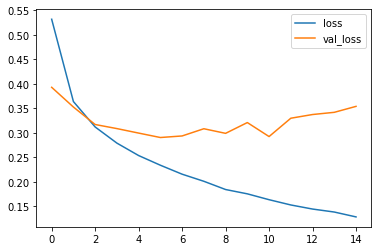

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

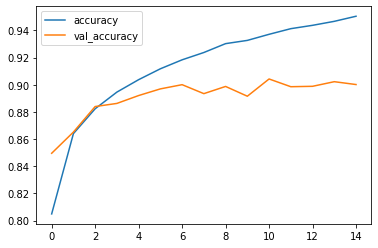

In [9]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

confusion matrix without normalization
[[821   0  22  14   3   0 132   0   8   0]
 [  2 973   1  14   2   0   6   0   2   0]
 [ 21   0 852  10  44   0  72   0   1   0]
 [ 10   1  17 909  27   0  35   0   1   0]
 [  1   1  70  17 812   0  98   0   1   0]
 [  0   0   0   0   0 974   0  16   0  10]
 [ 89   0  67  22  60   0 750   0  12   0]
 [  0   0   0   0   0   6   0 972   0  22]
 [  2   1   3   3   3   1   4   2 981   0]
 [  0   0   0   0   0   4   1  37   0 958]]


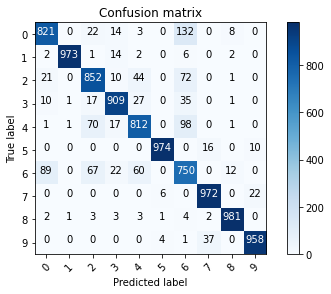

In [10]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float') /cm.sum(axis=1)[:,np.newaxis]
    print("normalized confusion matrix")
  else:
    print("confusion matrix without normalization")
  
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalize else 'd'
  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  
p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [11]:
#Label mapping
labels='''T-shirt/top
Trouser
Pullover
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

Text(0.5, 1.0, 'True label: Sandal Predicted: Sneaker')

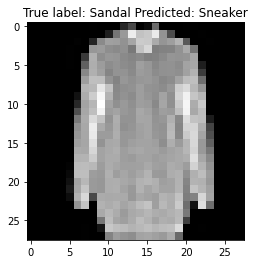

In [18]:
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]],labels[p_test[i]]))